In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [23]:
data = pd.read_csv('../data50/homogeneous-156/hypothesis', header=None, delimiter=' ')

In [52]:
%%time

X_dist = []
Y_signal = []

for i in range(len(data)):
    x_t = data.iat[i, 0]
    y_t = data.iat[i, 1]
    x_s = data.iat[i, 2]
    y_s = data.iat[i, 3]
    dist = math.sqrt((x_t-x_s)**2 + (y_t-y_s)**2)
    if dist in X_dist:
        continue
    signal = data.iloc[i, 4]
    X_dist.append(dist)
    Y_signal.append(signal)

CPU times: user 9.47 s, sys: 33.4 ms, total: 9.5 s
Wall time: 9.53 s


In [55]:
for x, y in zip(X_dist, Y_signal):
    if x == 1. or x == 2. or x == 3.:
        print(x, db_2_amplitude_(y))

1.0 0.018700928342558345
3.0 0.0012484136276759215
2.0 0.003390020287907448


In [ ]:
1.0 0.018700928342558366
2.0 0.0033900202879074528
3.0 0.0012484136276759217

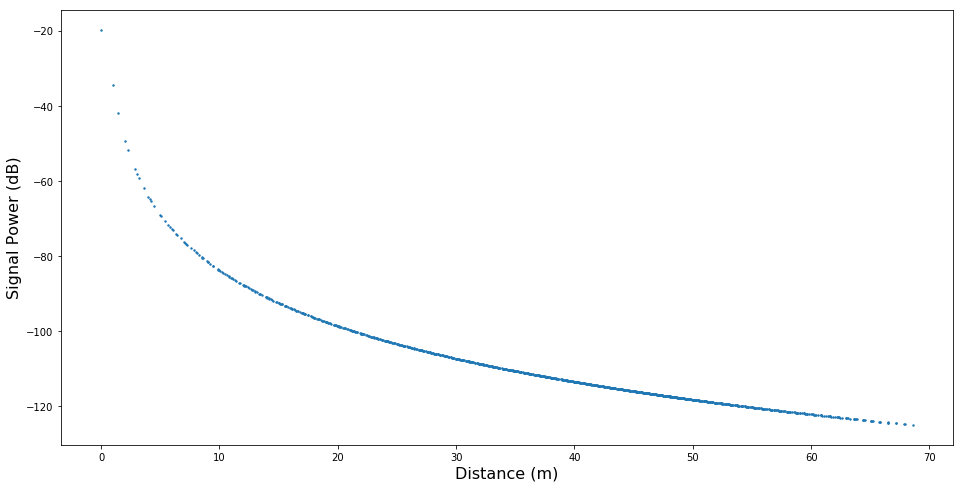

In [25]:
plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

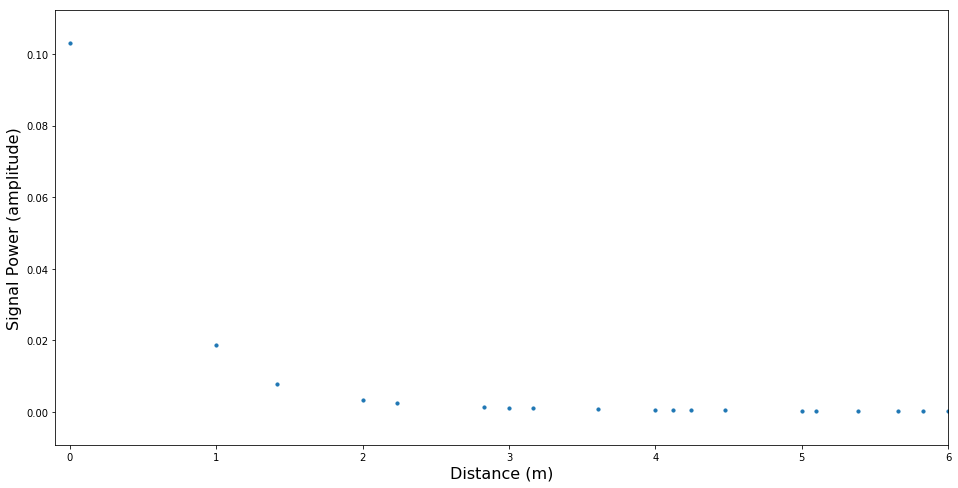

In [36]:
plt.figure(figsize=(16, 8))
plt.scatter(X_dist, db_2_amplitude_(Y_signal), s=10)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (amplitude)', fontsize=16)
plt.xlim([-0.1, 6])
plt.show()

In [51]:
for x, y in zip(X_dist, Y_signal):
    print(round(x, 2), y)

0.1 5.44010451136467
0.2 0.986157709609198
0.3 0.3631638217934486
0.4 0.17876623991139137
0.5 0.10316301708311494
0.6 0.06583270633212715
0.7 0.0450300005787394
0.8 0.03240594097745426
0.9 0.024243644802062665
1.0 0.018700928342558366
1.1 0.01478707185392588
1.2 0.011933857292307724
1.3 0.009797965518895951
1.4 0.008162836236263947
1.5 0.006886830110226796
1.6 0.005874403417305033
1.7 0.005059364871534917
1.8 0.00439477903055646
1.9 0.003846676221160871
2.0 0.0033900202879074528
2.1 0.0030060575254341813
2.2 0.0026805339641602097
2.3 0.002402472098550578
2.4 0.0021633160446825673
2.5 0.0019563241977168045
2.6 0.0017761311781343883
2.7 0.001618427491995247
2.8 0.0014797222865576322
2.9 0.0013571655827714622
3.0 0.0012484136276759217
3.1 0.001151525880740421
3.2 0.001064885464466336
3.3 0.0009871371986305722
3.4 0.0009171389379316383
3.5 0.0008539230651272623
3.6 0.0007966658019084461
3.7 0.0007446625854970864
3.8 0.0006973081866246304
3.9 0.0006540805597041886
4.0 0.0006145276502809134


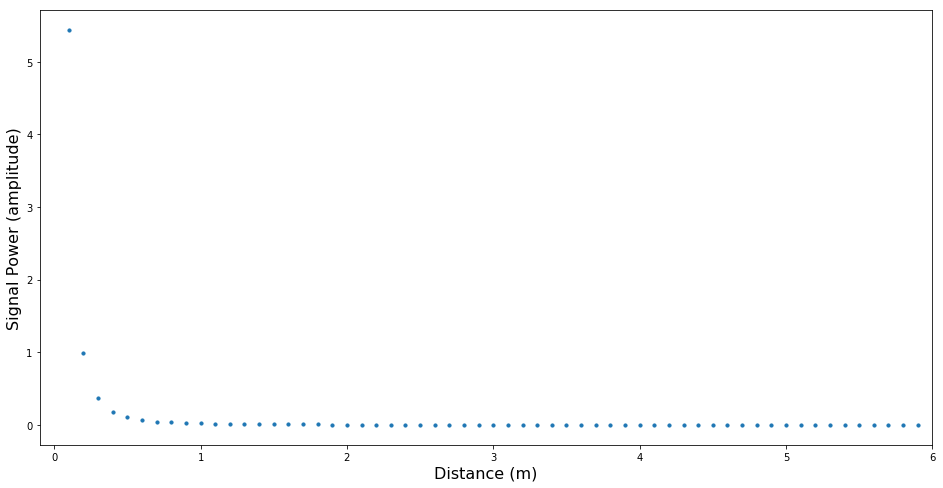

In [48]:
X_dist = np.arange(0.1, 6, 0.1)
Y_signal = amp(X_dist)
plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=10)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (amplitude)', fontsize=16)
plt.xlim([-0.1, 6])
plt.show()

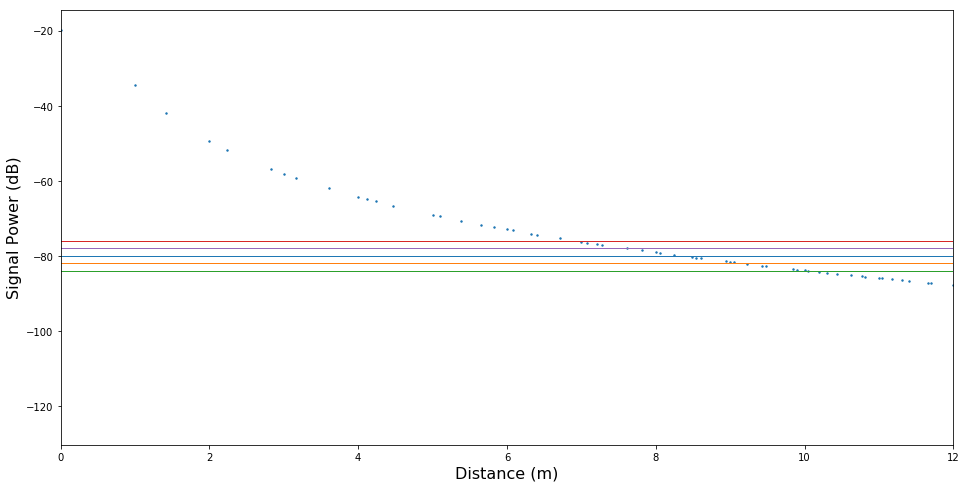

In [5]:
Y_80 = [-80] * len(X_dist)
Y_82 = [-82] * len(X_dist)
Y_84 = [-84] * len(X_dist)
Y_78 = [-78] * len(X_dist)
Y_76 = [-76] * len(X_dist)


plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.plot(X_dist, Y_80, linewidth=1)
plt.plot(X_dist, Y_82, linewidth=1)
plt.plot(X_dist, Y_84, linewidth=1)
plt.plot(X_dist, Y_76, linewidth=1)
plt.plot(X_dist, Y_78, linewidth=1)
plt.xlim([0, 12])
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

In [27]:
def amplitude_2_db_(abso):
    '''Transform the decibal signal strength into absolute value of iq samples
       y = 20*log10(x)
       where y is power in dB and x is the absolute value of iq samples
    '''
    return 20*np.log10(abso)


def db_2_amplitude_(db):
    '''Transform the decibal signal strength into absolute value of iq samples
       x = 10^(y/20)
       where y is power in dB and x is the absolute value of iq samples
    '''
    return np.power(10, np.array(db)/20)

In [56]:
def db(distance):
    return -34.56273667778001 - 49.274881540394276 * np.log10(distance)

In [39]:
def amp(distance):
    return np.power(10, -34.56273667778001/20) * np.power(distance, -49.274881540394276/20)

In [57]:
db(0.5)

-19.729519301331933

In [58]:
db(1)

-34.56273667778001

In [59]:
amp(0.5)

0.10316301708311494

In [60]:
amp(1)

0.018700928342558366

In [68]:
def delta(R):
    small = math.sqrt(2)/2 * R
    large = (2-math.sqrt(2)/2) * R
    
    sig_small = db(small)
    sig_large = db(large)
    
    #sig_small = []
    #sig_large = []
    #for dist, sig in zip(X_dist, Y_signal):
        #if dist > math.floor(small) and dist < math.ceil(small):
        #    sig_small.append(sig)
        #if dist > math.floor(large) and dist < math.ceil(large):
        #    sig_large.append(sig)
    
    #sig_small = np.mean(sig_small)
    #sig_large = np.mean(sig_large)
    
    new = amplitude_2_db_(db_2_amplitude_(sig_small) + db_2_amplitude_(sig_large)) 
    delta = new - sig_small
    print(R, sig_small, sig_large, new, delta)
    return delta

1 -27.14612798955597 -40.05997341529285 -25.375583710351584 1.7705442792043868
2 -41.97934536600405 -54.89319079174093 -40.20880108679967 1.7705442792043797
3 -50.656221296271625 -63.5700667220085 -48.88567701706724 1.7705442792043868
4 -56.81256274245212 -69.72640816818901 -55.04201846324774 1.7705442792043797
5 -61.58779215350217 -74.50163757923906 -59.81724787429778 1.770544279204394
6 -65.4894386727197 -78.40328409845658 -63.71889439351531 1.7705442792043868
7 -68.78823380127787 -81.70207922701474 -67.01768952207348 1.7705442792043868
8 -71.6457801189002 -84.55962554463707 -69.87523583969582 1.7705442792043868
9 -74.16631460298728 -87.08016002872415 -72.3957703237829 1.7705442792043868
10 -76.42100952995025 -89.33485495568712 -74.65046525074587 1.7705442792043868
11 -78.46062918776062 -91.37447461349751 -76.69008490855623 1.7705442792043868
12 -80.32265604916778 -93.23650147490466 -78.55211176996337 1.770544279204401
13 -82.03555471718505 -94.94940014292192 -80.26501043798066 1.770

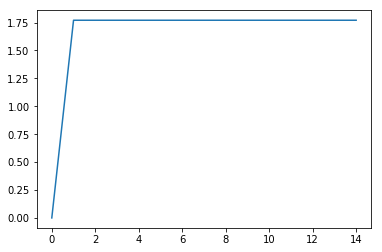

In [76]:
X = [0]
Y = [0]
for i in range(1, 15):
    X.append(i)
    Y.append(delta(i))
    
plt.plot(X, Y)

In [55]:
array = np.array(X_dist)

In [30]:
for dist, sig in zip(X_dist, Y_signal):
    if sig>=-91 and sig <= -90:
        print(dist, sig)

13.416407864998739 -90.12687944291687
13.92838827718412 -90.92831629289057
13.601470508735444 -90.42004585217478
13.341664064126334 -90.00732619273235
13.892443989449804 -90.87301950535027
13.45362404707371 -90.18615884426269


In [77]:
Y_signal.sort()

In [79]:
Y_signal[-5:]

[-51.783568759753116,
 -49.395954054228106,
 -41.97934536600405,
 -34.562736677780016,
 -19.729519301331923]

/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


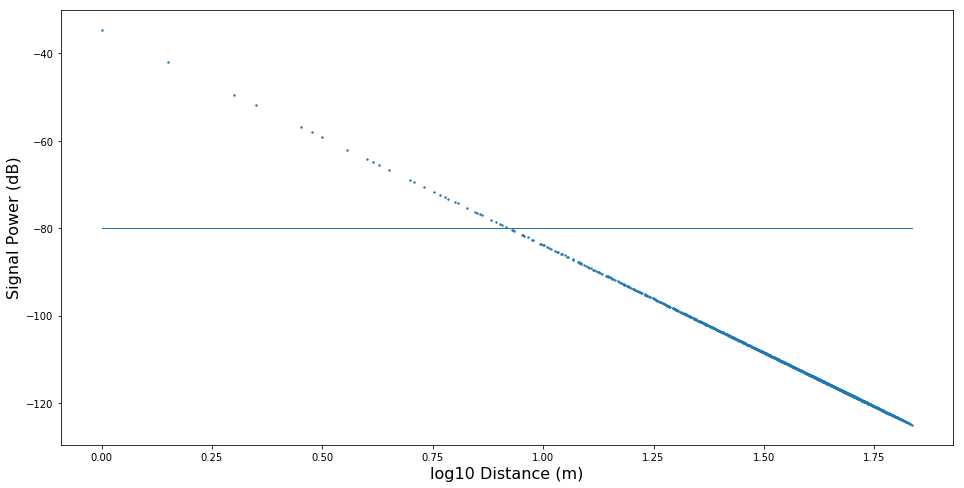

In [32]:
plt.figure(figsize=(16, 8))
plt.scatter(np.log10(X_dist), Y_signal, s=2)
plt.plot(np.log10(X_dist), Y_80, linewidth=1)
plt.xlabel('log10 Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

In [6]:
arr = np.zeros(5, dtype=int)

In [8]:
arr[0] = arr[3] = 1

In [9]:
arr

array([1, 0, 0, 1, 0])

In [14]:
np.where(arr<1, arr, -1)

array([-1,  0,  0, -1,  0])

In [22]:
arr = list(range(6))

In [27]:
len(np.unique([1, 1, 1, 2, 2, 3]))

3

In [20]:
arr.remove(4)

In [21]:
arr

[0, 1, 2, 3, 5]

In [31]:
alist = [1, 2, 3]
blist = [4, 5]

In [33]:
alist.extend(blist)

In [34]:
alist

[1, 2, 3, 4, 5]

In [35]:
alist

[1, 2, 3, 4, 5]

In [38]:
for a, b in enumerate(blist):
    print(a, b)

0 4
1 5


In [6]:
amplitude_2_db_(db_2_amplitude_(-40) - db_2_amplitude_(-41))

-59.27148961676608

In [3]:
db(8.3*0.905)

-77.7140646817112

In [10]:
amplitude_2_db_(db_2_amplitude_(-80)*3)

-70.45757490560675

In [23]:
%%time

A = list(range(20000))
B = list(range(0, 20000, 2))

C = [x for x in A if x not in set(B)]

CPU times: user 2.78 s, sys: 28.7 ms, total: 2.8 s
Wall time: 2.81 s


In [26]:
%%time

A = list(range(10000))
B = list(range(0, 40000, 2))

C = [x for x in A if x not in set(B)]

CPU times: user 2.25 s, sys: 17 ms, total: 2.27 s
Wall time: 2.27 s


In [52]:
%%time

A = list(range(20000))
B = list(range(0, 20000, 2))
B = set(B)
A = [x for x in A if x not in B]

CPU times: user 1.89 ms, sys: 157 µs, total: 2.05 ms
Wall time: 2.06 ms


In [70]:
A = {1}

In [71]:
B = {6, 7, 8}

In [72]:
A.union(B)

{1, 6, 7, 8}

In [58]:
A

{1, 2, 3}

In [12]:
mat = np.array([1.41, 0.5, 1.11, 1.41])
mle = np.array([1.01, 1.03, 0.97, 5.08])

In [13]:
mat.mean(), mle.mean()

(1.1075, 2.0225)

In [16]:
mat.var()*4/3, mle.var()*4/3

(0.18402499999999997, 4.155425)